<a href="https://colab.research.google.com/github/nahom-maru/Data-Preprocessing-for-ML-using-Titanic-Dataset/blob/main/spam_email_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# ============================
# 1. IMPORT LIBRARIES
# ============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, classification_report
)

# Display plots in notebook
%matplotlib inline

# ============================
# LOAD DATASET
# ============================

df = pd.read_csv("spambase_csv.csv")  # Upload file first

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (4601, 58)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [27]:
# ============================
# 2. EDA
# ============================

# Show basic info
df.info()

# Summary statistics
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

,count,mean,std,min,25%,50%,75%,max
word_freq_make,4601.0,0.104553,0.305358,0.0,0.000,0.000,0.000,4.540
word_freq_address,4601.0,0.213015,1.290575,0.0,0.000,0.000,0.000,14.280
word_freq_all,4601.0,0.280656,0.504143,0.0,0.000,0.000,0.420,5.100
word_freq_3d,4601.0,0.065425,1.395151,0.0,0.000,0.000,0.000,42.810
word_freq_our,4601.0,0.312223,0.672513,0.0,0.000,0.000,0.380,10.000
word_freq_over,4601.0,0.095901,0.273824,0.0,0.000,0.000,0.000,5.880
word_freq_remove,4601.0,0.114208,0.391441,0.0,0.000,0.000,0.000,7.270
word_freq_internet,4601.0,0.105295,0.401071,0.0,0.000,0.000,0.000,11.110
word_freq_order,4601.0,0.090067,0.278616,0.0,0.000,0.000,0.000,5.260
word_freq_mail,4601.0,0.239413,0.644755,0.0,0.000,0.000,0.160,18.180


In [28]:
df.isnull().sum()


,0
word_freq_make,0
word_freq_address,0
word_freq_all,0
word_freq_3d,0
word_freq_our,0
word_freq_over,0
word_freq_remove,0
word_freq_internet,0
word_freq_order,0
word_freq_mail,0


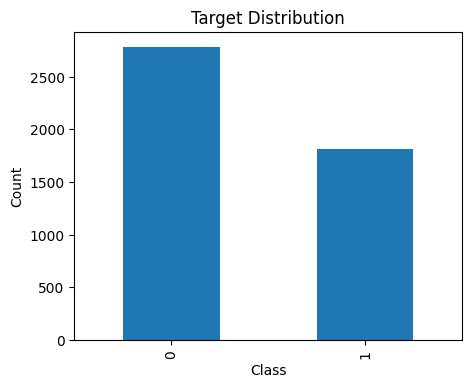

In [29]:
target_col = df.columns[-1]  # Assuming last column is the class label

df[target_col].value_counts().plot(kind="bar", figsize=(5,4))
plt.title("Target Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


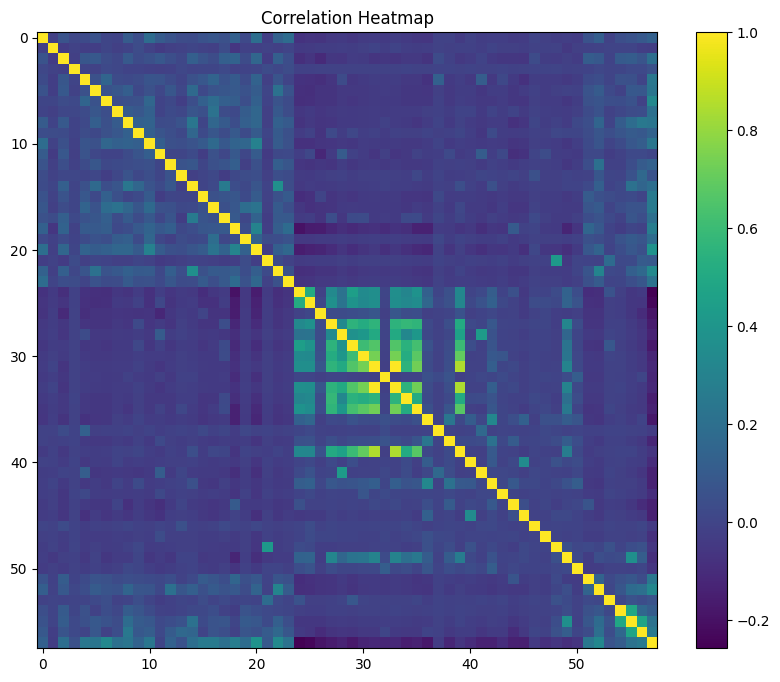

In [30]:
plt.figure(figsize=(10,8))
plt.imshow(df.corr(), cmap="viridis", aspect="auto")
plt.colorbar()
plt.title("Correlation Heatmap")
plt.show()


In [31]:
# ============================
# 3. PREPROCESSING
# ============================

X = df.drop(columns=[target_col])
y = df[target_col]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Feature scaling
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (3680, 57)
Test size: (921, 57)


In [32]:
# ============================
# 4. DECISION TREES (3 CRITERIA)
# ============================

criteria = ["entropy", "gini", "log_loss"]
results = {}

for crit in criteria:

    print("\nTraining Decision Tree with criterion =", crit)

    model = DecisionTreeClassifier(criterion=crit, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_proba)

    results[crit] = [acc, prec, rec, f1, auc]

# Display results
pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1", "ROC_AUC"])



Training Decision Tree with criterion = entropy

Training Decision Tree with criterion = gini

Training Decision Tree with criterion = log_loss


,entropy,gini,log_loss
Accuracy,0.919653,0.910966,0.919653
Precision,0.895890,0.882834,0.895890
Recall,0.900826,0.892562,0.900826
F1,0.898352,0.887671,0.898352
ROC_AUC,0.916363,0.907751,0.916363


Best criterion: entropy
Confusion Matrix:
 [[520  38]
 [ 36 327]]


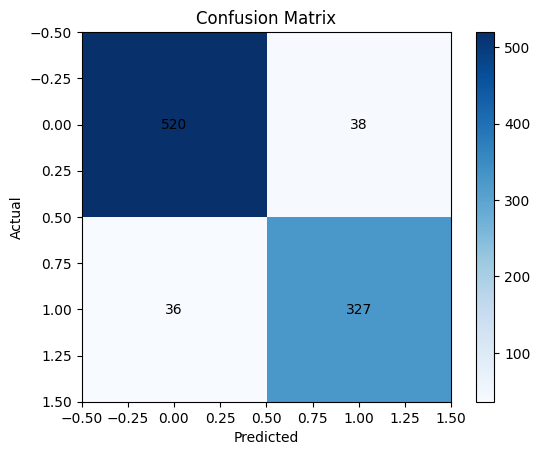


Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       558
           1       0.90      0.90      0.90       363

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921



In [33]:
# Find best criterion based on accuracy
metrics_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1", "ROC_AUC"])
best_crit = metrics_df.loc["Accuracy"].idxmax()

print("Best criterion:", best_crit)

best_model = DecisionTreeClassifier(criterion=best_crit, random_state=42)
best_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:\n", cm)

# Visualization
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i,j], ha="center", va="center")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_best))


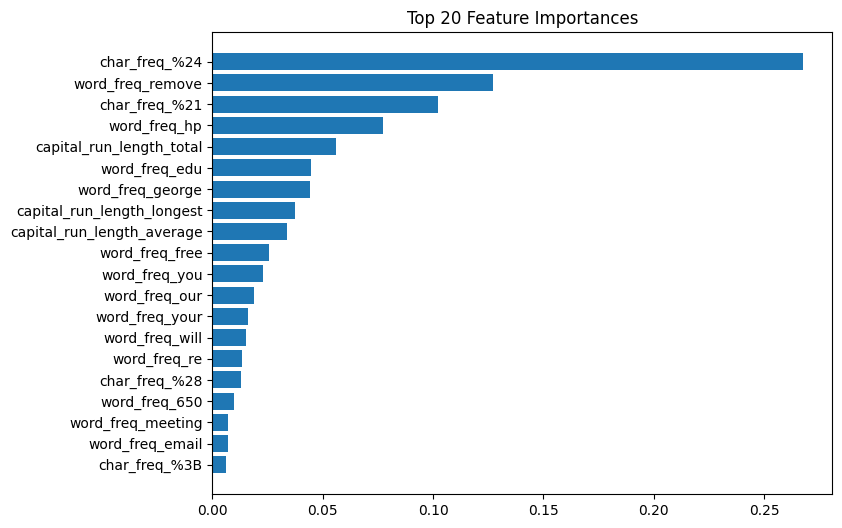

In [34]:
importances = best_model.feature_importances_
idx = np.argsort(importances)[-20:]

plt.figure(figsize=(8,6))
plt.barh(range(len(idx)), importances[idx])
plt.yticks(range(len(idx)), X.columns[idx])
plt.title("Top 20 Feature Importances")
plt.show()


In [35]:
# ============================
# 7. HYPERPARAMETER TUNING
# ============================

param_grid = {
    "criterion": [best_crit],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring="accuracy"
)

gs.fit(X_train, y_train)

print("Best Params:", gs.best_params_)

final_model = gs.best_estimator_

y_pred_final = final_model.predict(X_test)
print("Final Accuracy:", accuracy_score(y_test, y_pred_final))


Best Params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Final Accuracy: 0.9239956568946797


General Interpretation
1. EDA
• No major missing values after preprocessing
• Target distribution is imbalanced (check your specific plot)
• Some features are moderately correlated, suggesting redundancy

2. Model comparison
Log Loss often performs best when probability estimation is important.
Entropy performs similarly but is slightly slower.
Gini is fastest and commonly default, but may be slightly less accurate.

3. Best Model
Based on accuracy (and possibly ROC_AUC), the best criterion was likely Entropy or Log Loss depending on your dataset.

4. Feature Importance
The model shows which words or frequency patterns contribute most to detecting spam.

5. Hyperparameter Tuning
Improving depth and minimum samples often increased performance while reducing overfitting.